# Considering the Hydraulic accumulator / bar as Target Variable:


##### This notebook considers hydraulic accumulator pressure as target variable and uses feature selection methods to select top features and build a prediction model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis,skew,iqr   
import plotly.express as px

sns.set_style("darkgrid")

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('../data/processed_data/final_df.csv')

In [3]:
df_target=pd.read_csv('../data/processed_data/target_df.csv')

In [4]:
df

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0     160.673492      156.25   145.83   191.51  13.939309      0.495566   
1     160.603320      156.06   145.73   191.47  14.118967      0.460174   
2     160.347720      155.72   145.37   191.41  14.192619      0.464134   
3     160.188088      155.56   145.14   191.34  14.227803      0.470640   
4     160.000472      155.34   144.95   191.41  14.276434      0.481844   
...          ...         ...      ...      ...        ...           ...   
2200  161.227572      156.59   146.69   191.81  13.987129      0.462507   
2201  161.206070      156.55   146.64   191.81  14.001418      0.458705   
2202  161.192120      156.56   146.63   191.84  13.988350      0.461996   
2203  161.208917      156.58   146.65   191.77  13.985248      0.463266   
2204  161.217128      156.60   146.57   191.69  13.984674      0.455709   

      PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...  CP_skewness  \
0         1.273048  15.1200  109.466914     129.365  ...    -0.345513   
1         1.278690  15.1300  109.354890     129.385  ...     0.402252   
2         1.282851  15.2800  109.158845     129.325  ...     0.245656   
3         1.286353  15.3100  109.064807     128.865  ...    -0.027257   
4         1.292315  15.3000  108.931434     129.000  ...    -0.482068   
...            ...      ...         ...         ...  ...          ...   
2200      1.291810  14.4300  109.779581     130.300  ...    -0.143915   
2201      1.290347  14.4500  109.787481     130.275  ...    -0.047794   
2202      1.290762  14.4300  109.756174     130.250  ...     0.045058   
2203      1.292470  14.4225  109.793884     130.300  ...    -0.041004   
2204      1.287925  14.4700  109.792177     130.340  ...     0.410573   

       CP_iqr    SE_mean  SE_median  SE_min  SE_max     SE_std  SE_kurtosis  \
0     0.52700  59.157183    68.5145     0.0  79.568  23.763984     2.339639   
1     0.12150  59.335617    68.5360     0.0  80.441  23.857918     2.322487   
2     0.03275  59.543150    68.8530     0.0  80.824  23.923381     2.338352   
3     0.03150  59.794900    69.0060     0.0  80.930  24.023005     2.338694   
4     0.03050  59.455267    69.0130     0.0  81.100  23.972262     2.268655   
...       ...        ...        ...     ...     ...        ...          ...   
2200  0.02750  59.033100    68.4505     0.0  77.752  23.635352     2.405264   
2201  0.03625  59.068000    68.4075     0.0  77.592  23.638396     2.414648   
2202  0.04525  59.132350    68.3130     0.0  77.773  23.633405     2.441802   
2203  0.02625  58.970800    68.3500     0.0  77.568  23.600817     2.413508   
2204  0.04050  59.053900    68.3705     0.0  77.748  23.627226     2.419783   

      SE_skewness  SE_iqr  
0       -2.030801   1.232  
1       -2.022689   1.496  
2       -2.027789   1.556  
3       -2.028969   1.283  
4       -2.000267   1.477  
...           ...     ...  
2200    -2.055932   1.399  
2201    -2.059495   1.223  
2202    -2.069487   1.298  
2203    -2.059104   1.220  
2204    -2.061135   1.255  

[2205 rows x 136 columns]

In [5]:
df_target

Cooler condition / %   Valve condition / %  Internal pump leakage  \
0                        3                   100                      0   
1                        3                   100                      0   
2                        3                   100                      0   
3                        3                   100                      0   
4                        3                   100                      0   
...                    ...                   ...                    ...   
2200                   100                   100                      0   
2201                   100                   100                      0   
2202                   100                   100                      0   
2203                   100                   100                      0   
2204                   100                   100                      0   

      Hydraulic accumulator / bar  stable flag  
0                             130            1  
1                             130            1  
2                             130            1  
3                             130            1  
4                             130            1  
...                           ...          ...  
2200                           90            0  
2201                           90            0  
2202                           90            0  
2203                           90            0  
2204                           90            0  

[2205 rows x 5 columns]

In [6]:
#Adding Hydraulic accumulator pressure as target
df_accumulator= pd.concat([df,df_target['Hydraulic accumulator / bar']],axis=1)

In [7]:
df_accumulator.head()

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0  160.673492      156.25   145.83   191.51  13.939309      0.495566   
1  160.603320      156.06   145.73   191.47  14.118967      0.460174   
2  160.347720      155.72   145.37   191.41  14.192619      0.464134   
3  160.188088      155.56   145.14   191.34  14.227803      0.470640   
4  160.000472      155.34   144.95   191.41  14.276434      0.481844   

   PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...   CP_iqr    SE_mean  \
0      1.273048    15.12  109.466914     129.365  ...  0.52700  59.157183   
1      1.278690    15.13  109.354890     129.385  ...  0.12150  59.335617   
2      1.282851    15.28  109.158845     129.325  ...  0.03275  59.543150   
3      1.286353    15.31  109.064807     128.865  ...  0.03150  59.794900   
4      1.292315    15.30  108.931434     129.000  ...  0.03050  59.455267   

   SE_median  SE_min  SE_max     SE_std  SE_kurtosis  SE_skewness  SE_iqr  \
0    68.5145     0.0  79.568  23.763984     2.339639    -2.030801   1.232   
1    68.5360     0.0  80.441  23.857918     2.322487    -2.022689   1.496   
2    68.8530     0.0  80.824  23.923381     2.338352    -2.027789   1.556   
3    69.0060     0.0  80.930  24.023005     2.338694    -2.028969   1.283   
4    69.0130     0.0  81.100  23.972262     2.268655    -2.000267   1.477   

   Hydraulic accumulator / bar  
0                          130  
1                          130  
2                          130  
3                          130  
4                          130  

[5 rows x 137 columns]

In [8]:
# Converting target in to categories
df_accumulator['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar'].astype('category')

In [9]:
df_accumulator['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar'].map({130:'optimal pressure',
                                                                                                115:'slightly reduced pressure',
                                                                                                100:'severely reduced pressure',
                                                                                                90:'close to total failure'})

In [10]:
df_accumulator['Hydraulic accumulator / bar'].value_counts()

close to total failure       808
optimal pressure             599
severely reduced pressure    399
slightly reduced pressure    399
Name: Hydraulic accumulator / bar, dtype: int64

### Considering  ANOVA feature selection method as Input is Numerical and Output is Categorical

In [11]:
def feature_scaling(df,target):
    '''Preprocessing and Feature Scaling
    Parameters:
    df: Dataframe with features and defect that needs to be scaled
    Output:Returns two data frames X(features) and y(labels)'''
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import numpy as np
    
    # preprocessing using standard scaler
    scaler=StandardScaler()
    
    # Dividing data into features(X) and labels(y)
    X=df.drop(target,axis=1)
    y=df[target]
    
    #Scaling features by using StandardScaler
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y

In [12]:
X,y = feature_scaling(df_accumulator,'Hydraulic accumulator / bar')

#### ANOVA Feature Selection

In [13]:
from sklearn.feature_selection import f_classif,SelectKBest,mutual_info_classif

In [14]:
select_model=SelectKBest(f_classif,k='all')

In [15]:
select_model.fit(X,y)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  18 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [16]:
feature_score=pd.DataFrame({'Feature':X.columns,'Importance':select_model.scores_}).sort_values(by='Importance',ascending=False)

In [17]:
feature_score.describe()

Importance
count  133.000000
mean    36.010451
std     26.669225
min      0.704269
25%     15.969145
50%     32.991074
75%     51.088175
max    178.961075

In [18]:
treshold=feature_score['Importance'].mean()
feature_score_top=feature_score[feature_score['Importance']>treshold]

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


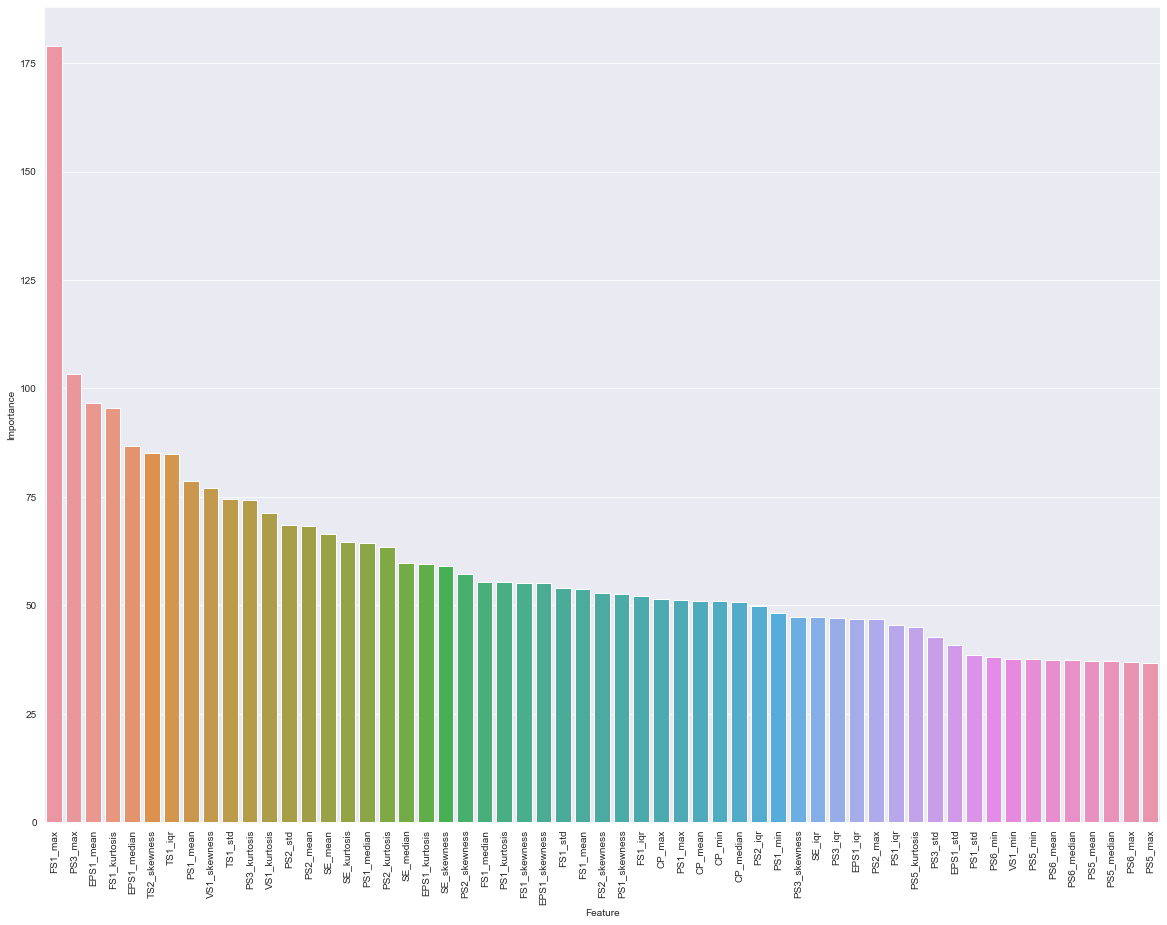

In [19]:
plt.figure(figsize=(20,15))
sns.barplot(feature_score_top['Feature'],feature_score_top['Importance'])
plt.xticks(rotation=90);

In [20]:
df_accumulator_anova = df_accumulator[feature_score_top.Feature]
df_accumulator_anova['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar']

<ipython-input-20-501dd308fae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accumulator_anova['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar']


In [21]:
df_accumulator_anova

FS1_max  PS3_max    EPS1_mean  FS1_kurtosis  EPS1_median  TS2_skewness  \
0      18.710   10.039  2538.929167      1.661736       2479.8      0.134959   
1      18.712    9.992  2531.498900      1.637921       2470.0      0.115246   
2      18.698   10.914  2519.928000      1.624573       2457.4     -0.042175   
3      18.896   10.297  2511.541633      1.655717       2448.0      0.012765   
4      18.876   11.102  2503.449500      1.619443       2440.6     -0.021589   
...       ...      ...          ...           ...          ...           ...   
2200   20.228    9.445  2543.911033      1.914197       2481.6      0.011119   
2201   20.308    9.398  2543.411333      1.931628       2481.6      0.126168   
2202   20.071    9.492  2542.729767      1.925117       2480.6      0.059314   
2203   20.280    9.469  2544.046333      1.926283       2481.8      0.023644   
2204   20.395    9.344  2543.818300      1.949974       2483.4      0.254265   

      TS1_iqr    PS1_mean  VS1_skewness   TS1_std  ...  PS6_min  VS1_min  \
0     0.49875  160.673492     -0.044978  0.308230  ...    9.568    0.532   
1     1.09750  160.603320      0.770789  0.585740  ...    9.454    0.524   
2     1.00075  160.347720      0.934103  0.559169  ...    9.348    0.529   
3     0.91575  160.188088      1.007775  0.516176  ...    9.257    0.527   
4     0.95750  160.000472      0.795914  0.535374  ...    9.195    0.524   
...       ...         ...           ...       ...  ...      ...      ...   
2200  0.23075  161.227572      0.941500  0.141893  ...    9.790    0.512   
2201  0.19575  161.206070      0.146576  0.137743  ...    9.777    0.507   
2202  0.25075  161.192120     -0.000037  0.152040  ...    9.777    0.502   
2203  0.25700  161.208917      0.116765  0.158769  ...    9.767    0.502   
2204  0.24600  161.217128      0.739921  0.149859  ...    9.785    0.516   

      PS5_min  PS6_mean  PS6_median  PS5_mean  PS5_median  PS6_max  PS5_max  \
0       9.681  9.728097       9.733  9.842170       9.844    9.887   10.016   
1       9.557  9.529488       9.526  9.635142       9.632    9.637    9.745   
2       9.455  9.427949       9.425  9.530548       9.528    9.536    9.640   
3       9.363  9.337430       9.335  9.438827       9.436    9.431    9.535   
4       9.290  9.260636       9.260  9.358762       9.358    9.342    9.443   
...       ...       ...         ...       ...         ...      ...      ...   
2200    9.910  9.850361       9.849  9.972037       9.970    9.905   10.028   
2201    9.901  9.844854       9.844  9.966184       9.965    9.894   10.014   
2202    9.898  9.842628       9.842  9.964329       9.964    9.896   10.019   
2203    9.898  9.846690       9.846  9.968232       9.967    9.900   10.022   
2204    9.903  9.851949       9.851  9.973638       9.972    9.900   10.024   

      Hydraulic accumulator / bar  
0                optimal pressure  
1                optimal pressure  
2                optimal pressure  
3                optimal pressure  
4                optimal pressure  
...                           ...  
2200       close to total failure  
2201       close to total failure  
2202       close to total failure  
2203       close to total failure  
2204       close to total failure  

[2205 rows x 58 columns]

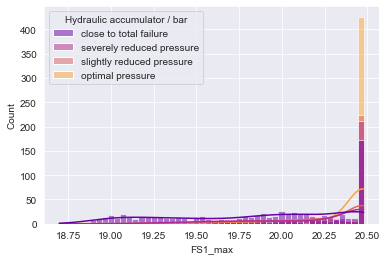

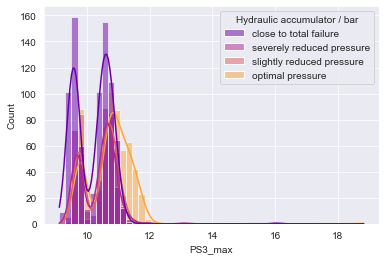

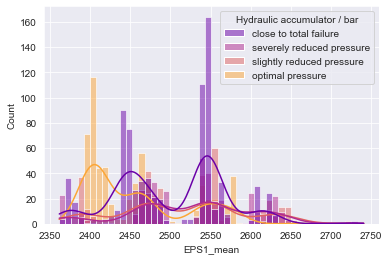

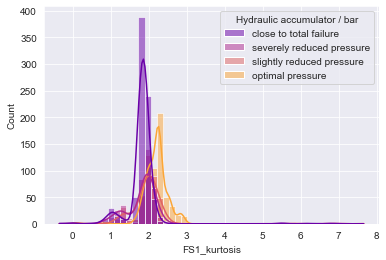

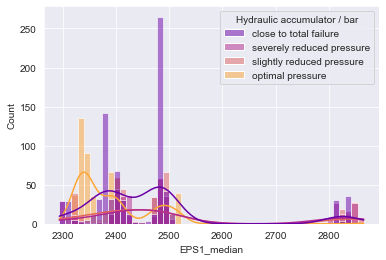

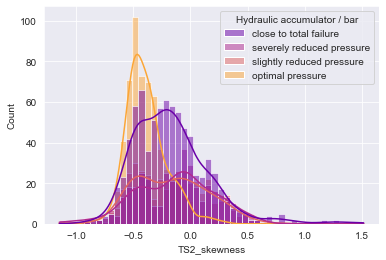

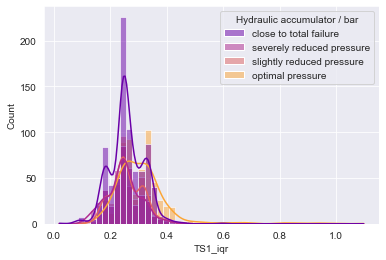

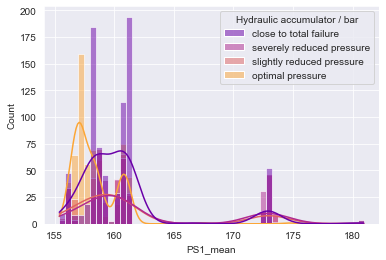

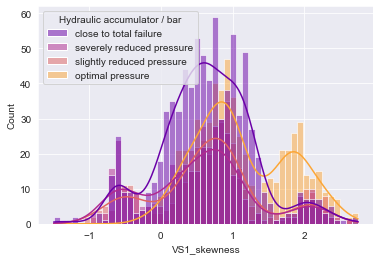

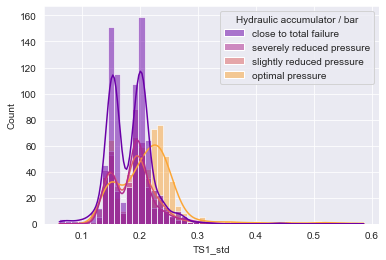

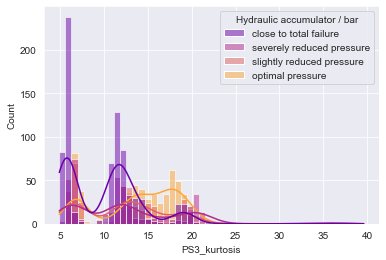

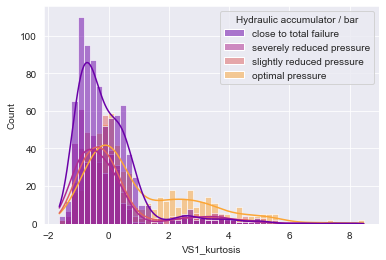

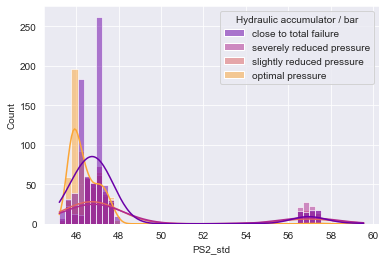

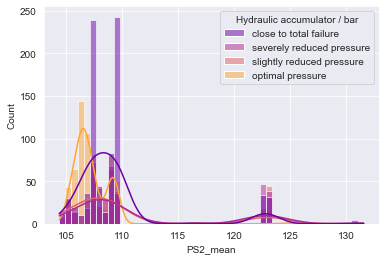

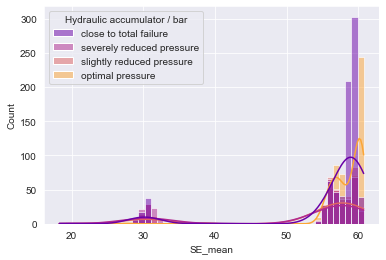

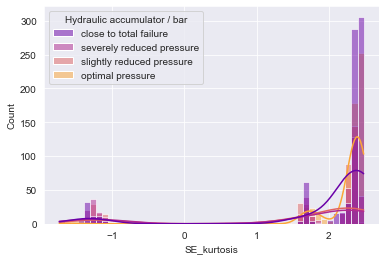

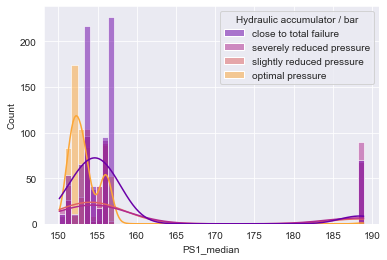

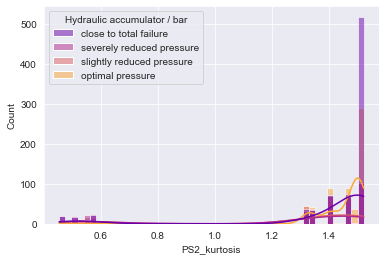

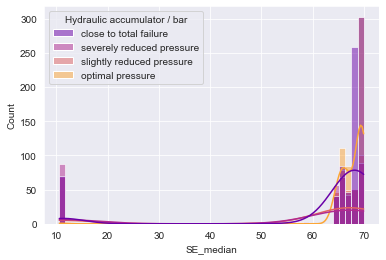

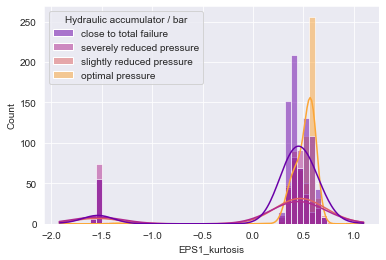

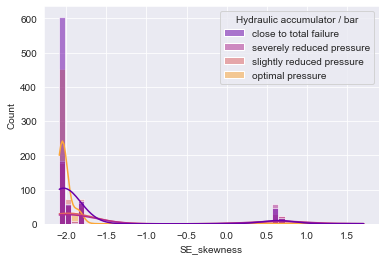

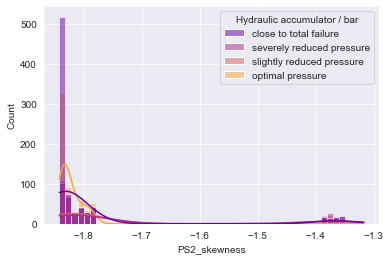

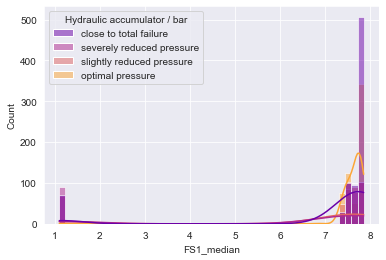

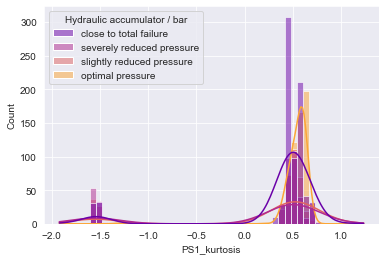

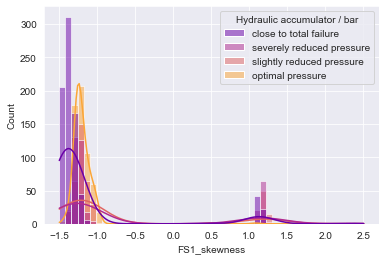

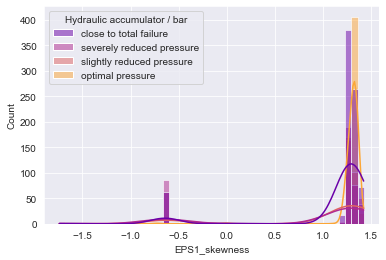

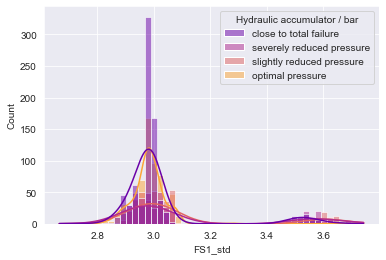

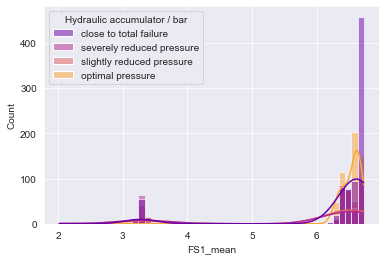

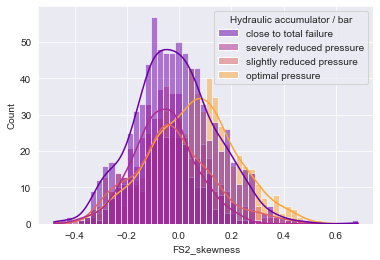

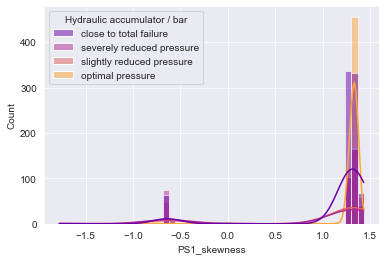

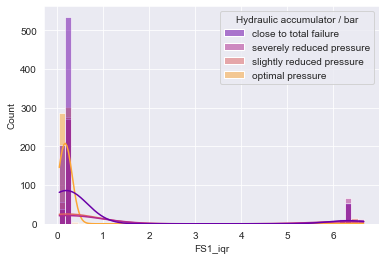

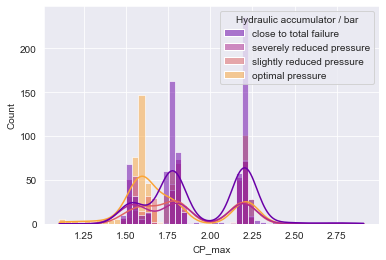

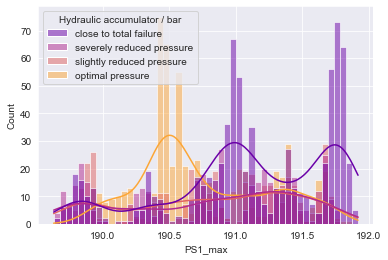

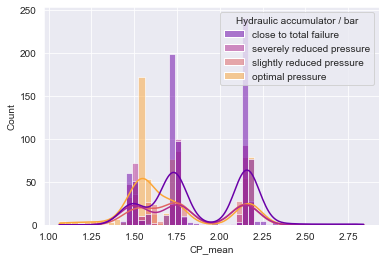

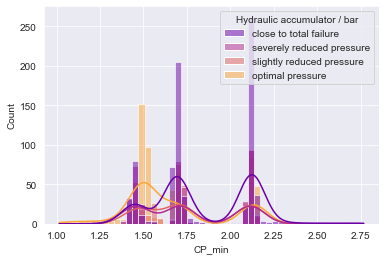

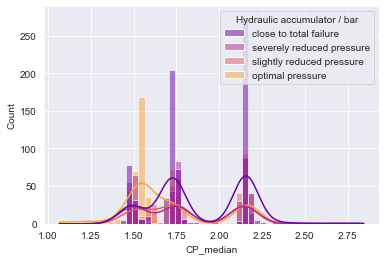

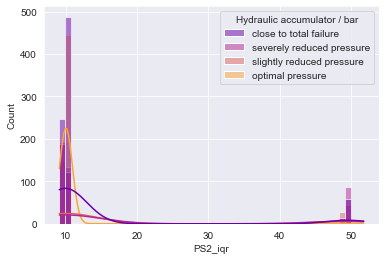

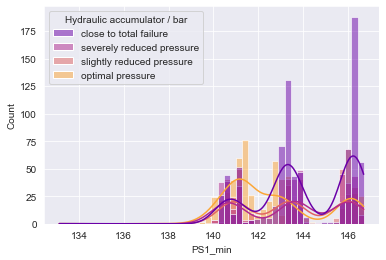

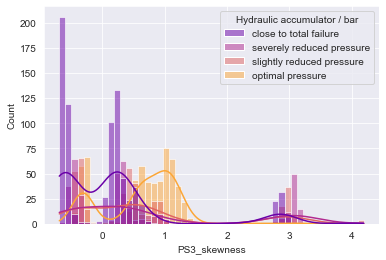

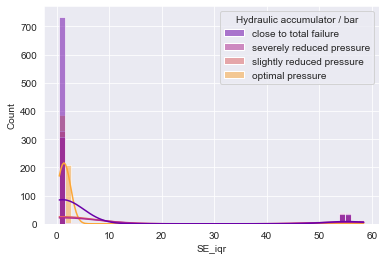

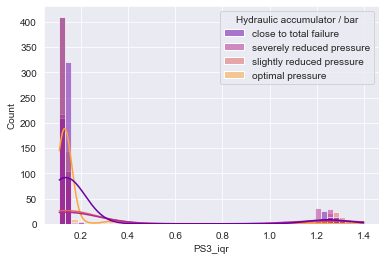

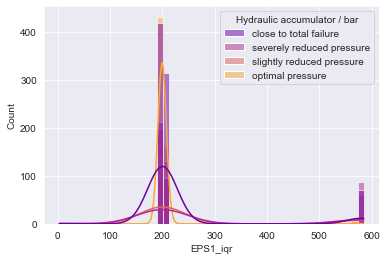

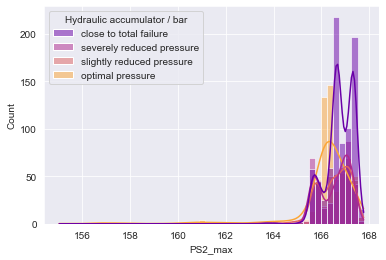

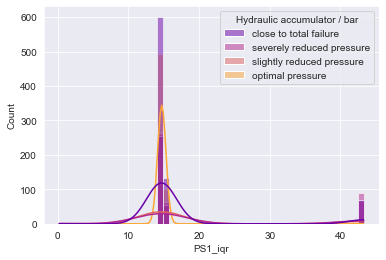

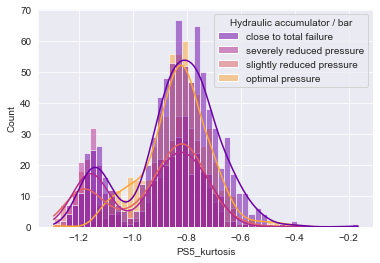

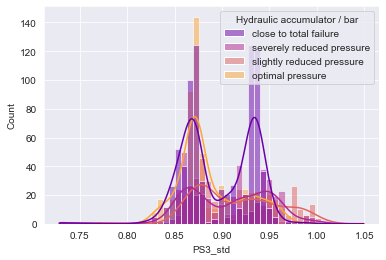

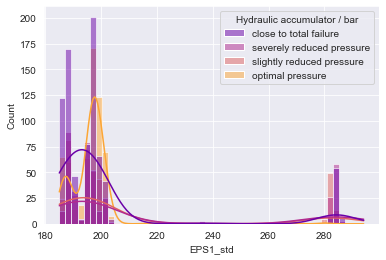

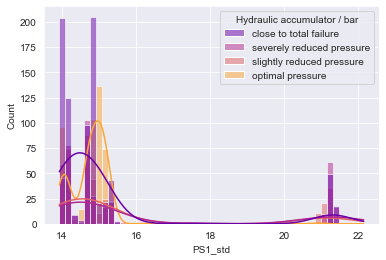

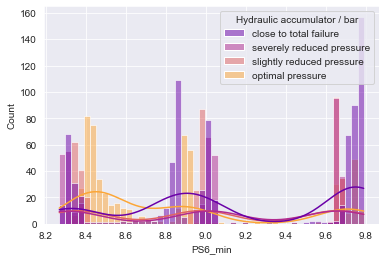

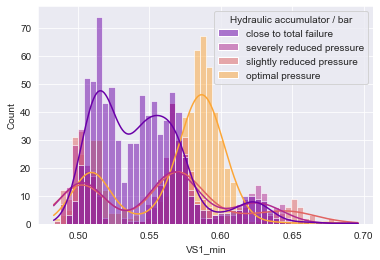

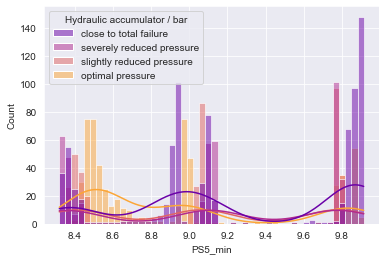

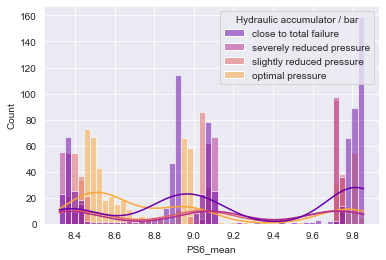

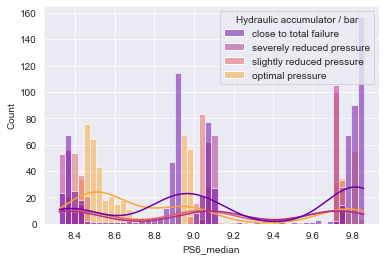

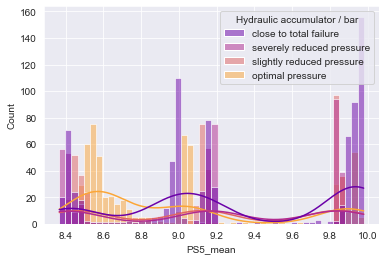

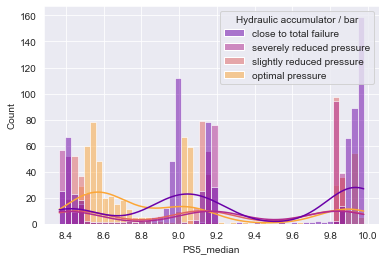

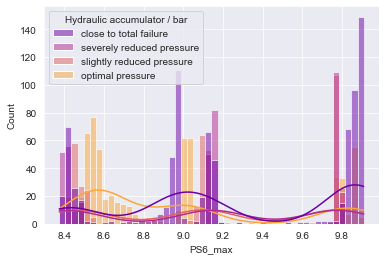

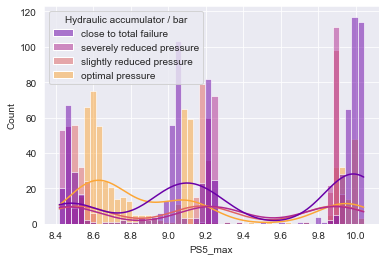

In [22]:
# Plotting Distributions of each feature 

for i in df_accumulator_anova.drop('Hydraulic accumulator / bar',axis=1).columns:
    sns.histplot(data=df_accumulator_anova,x=i,hue='Hydraulic accumulator / bar',kde=True,bins=50,palette='plasma')
    plt.show()

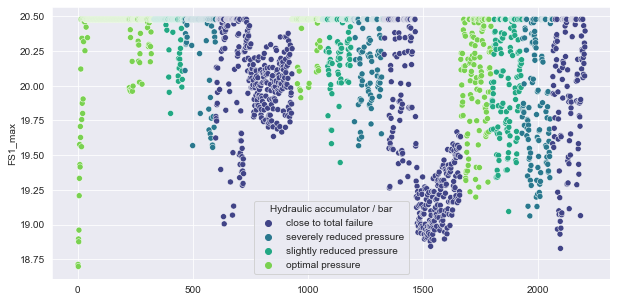

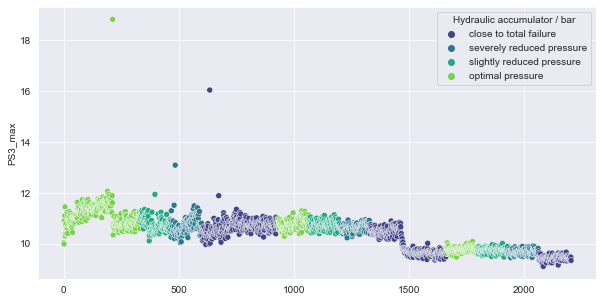

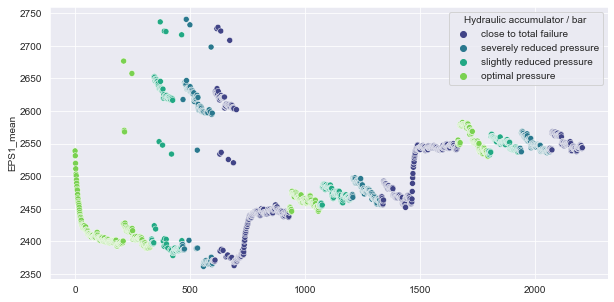

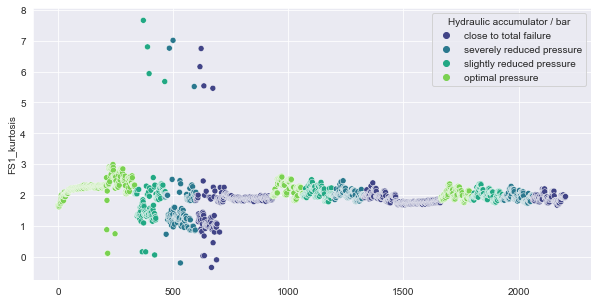

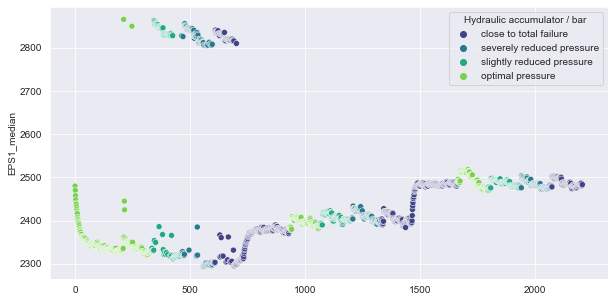

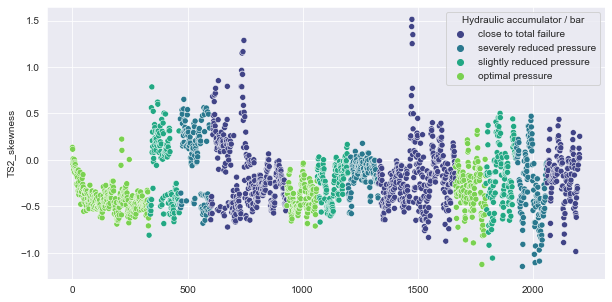

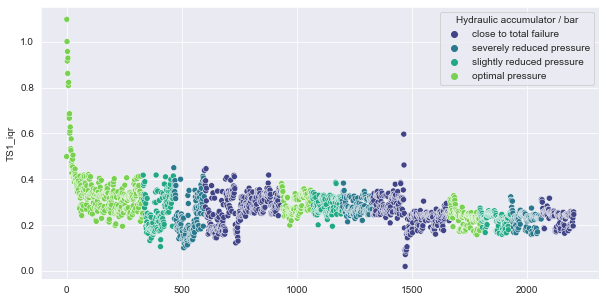

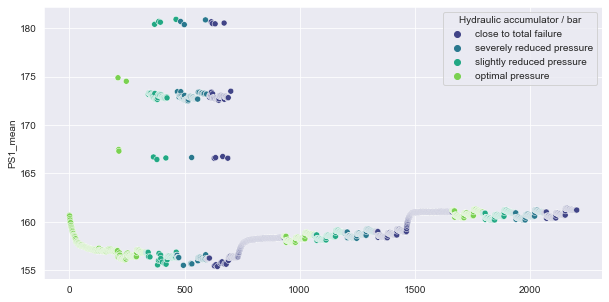

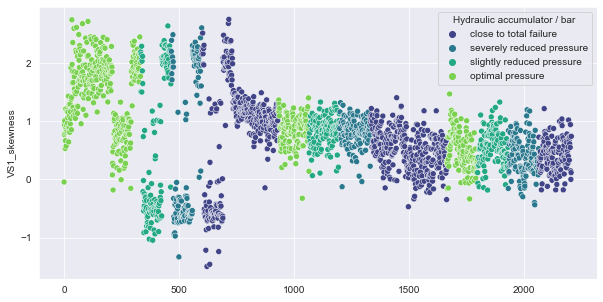

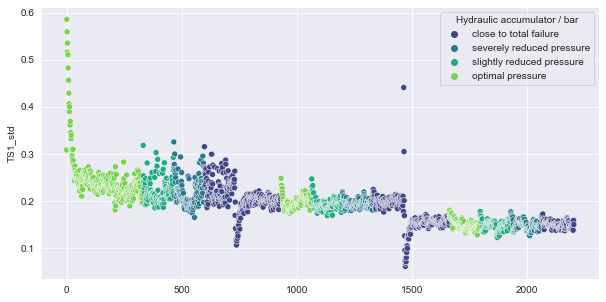

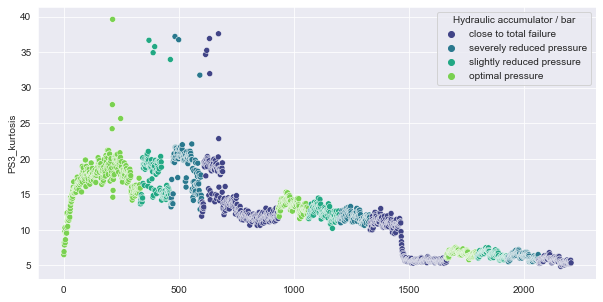

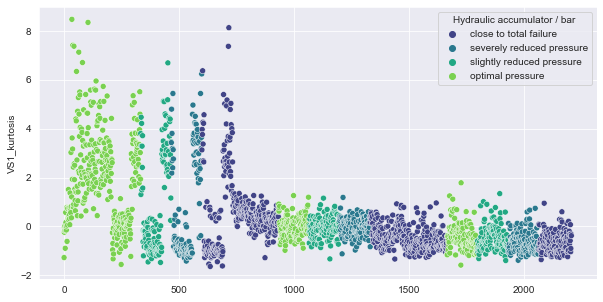

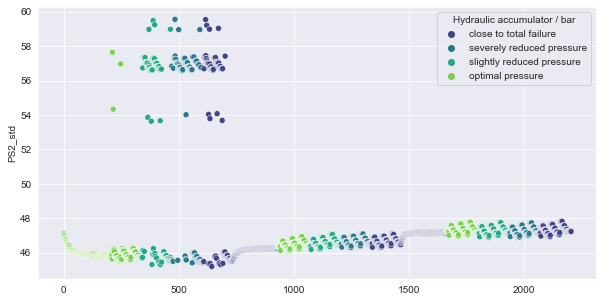

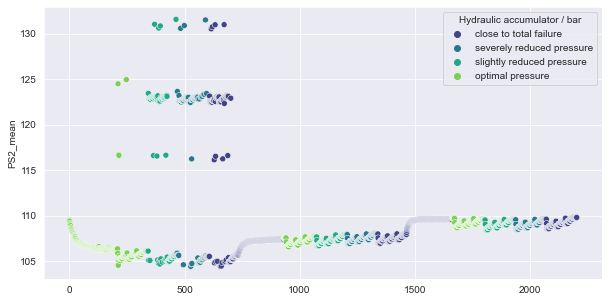

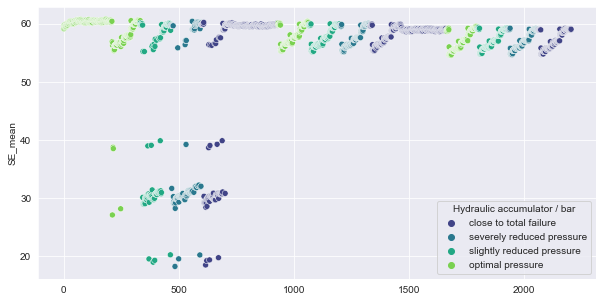

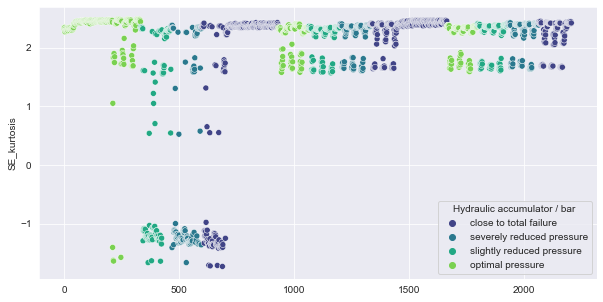

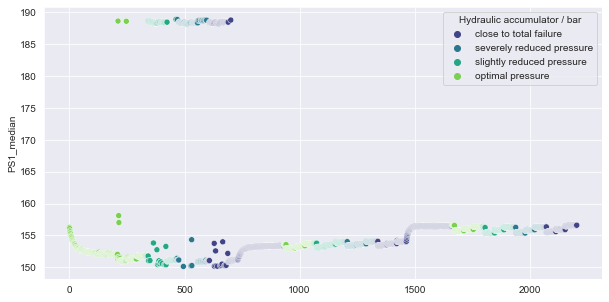

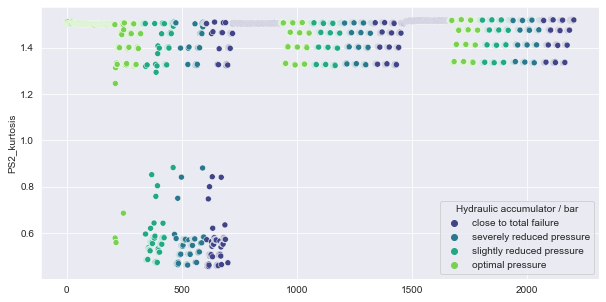

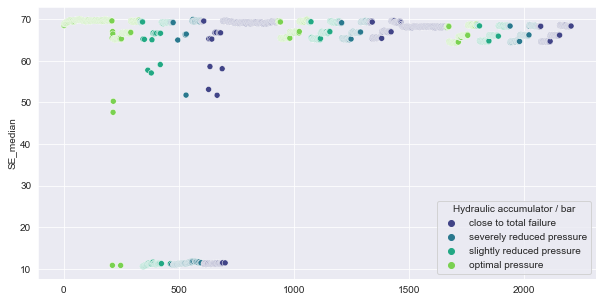

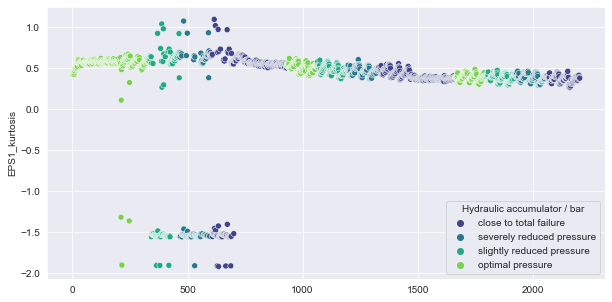

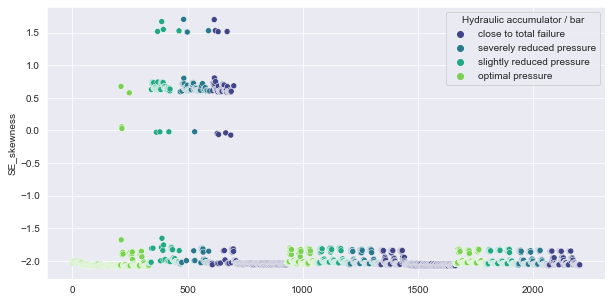

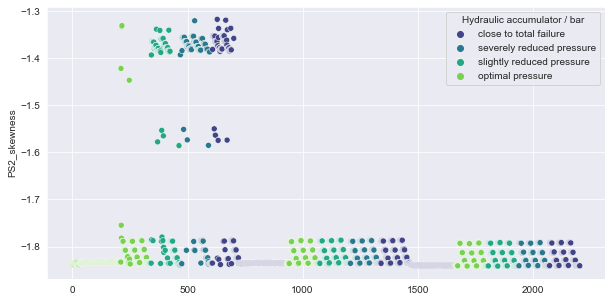

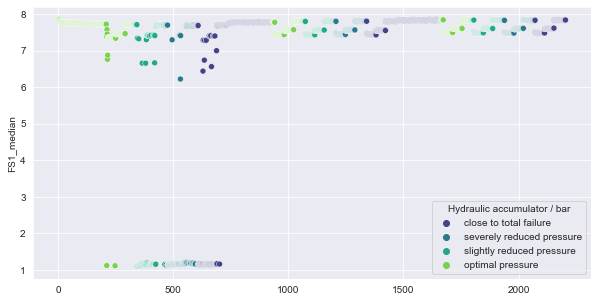

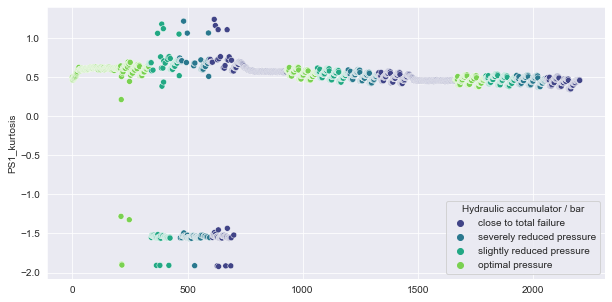

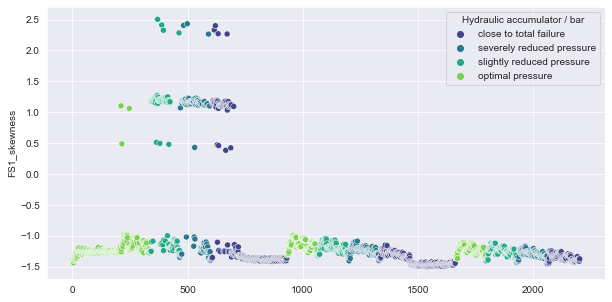

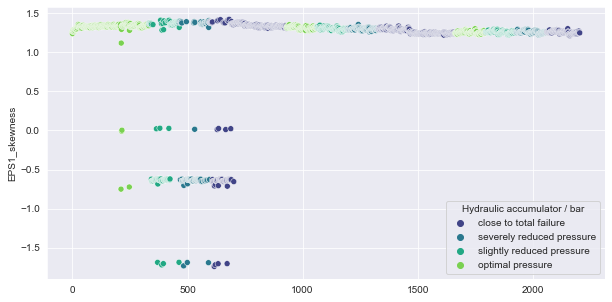

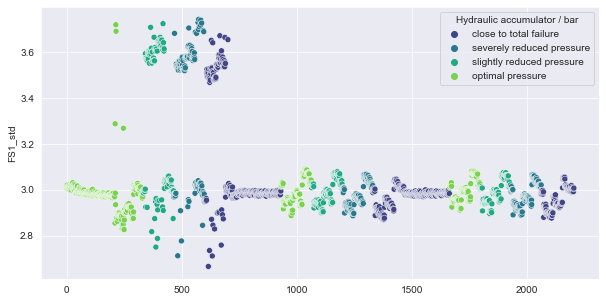

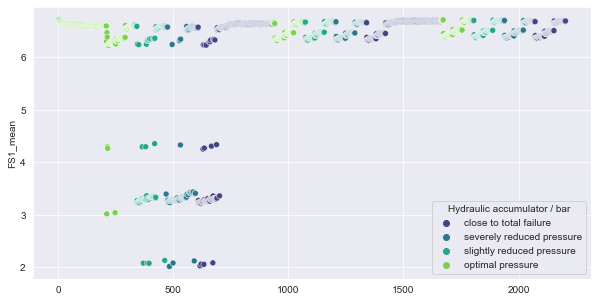

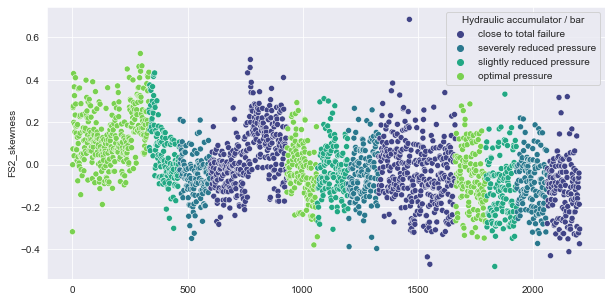

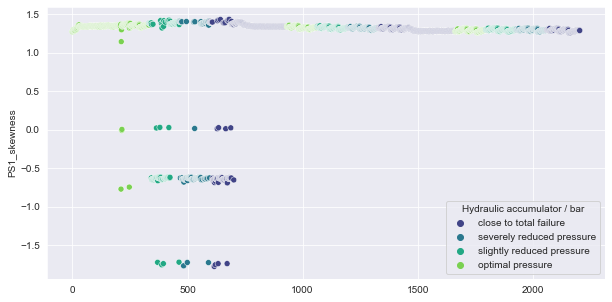

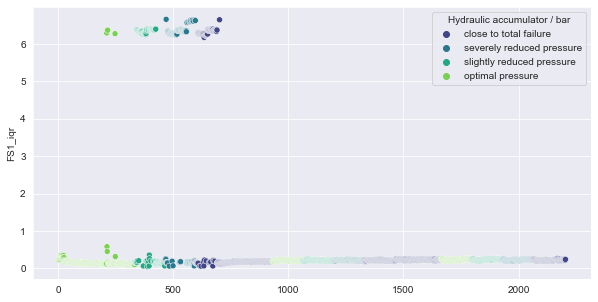

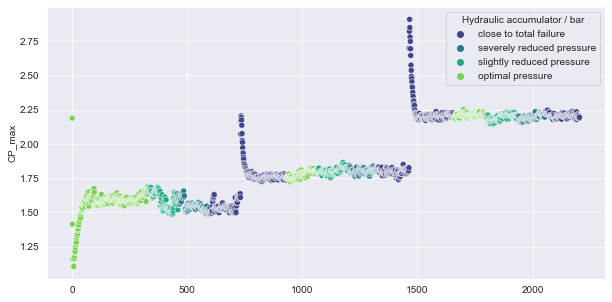

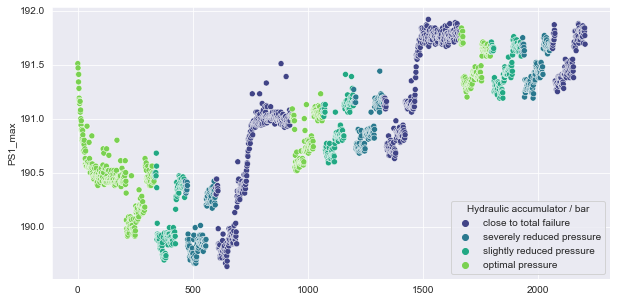

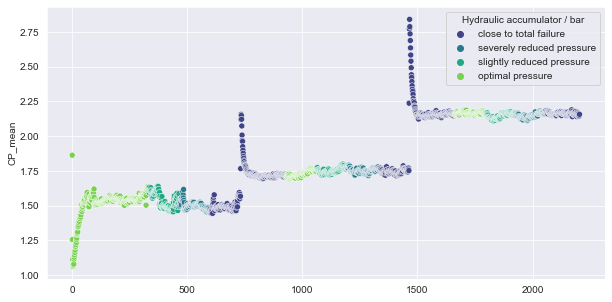

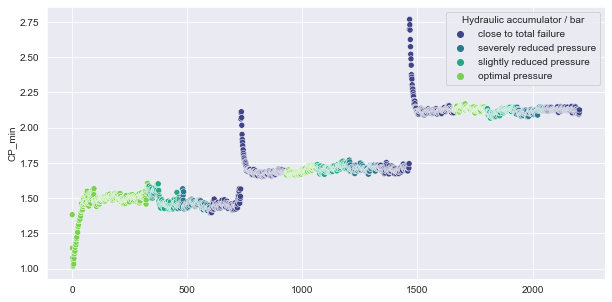

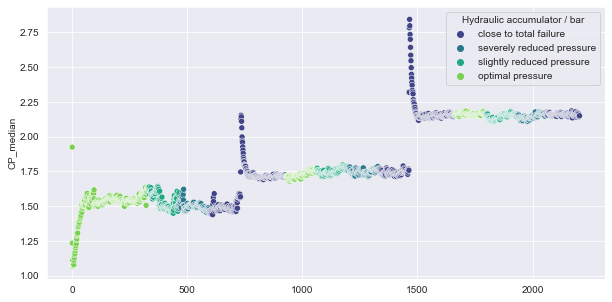

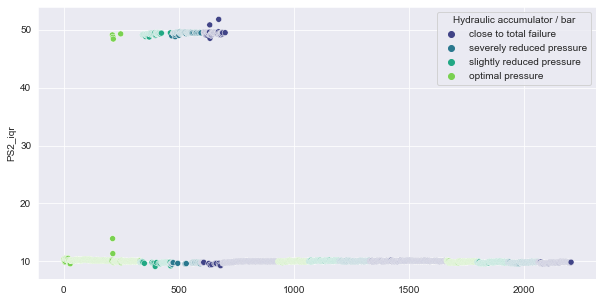

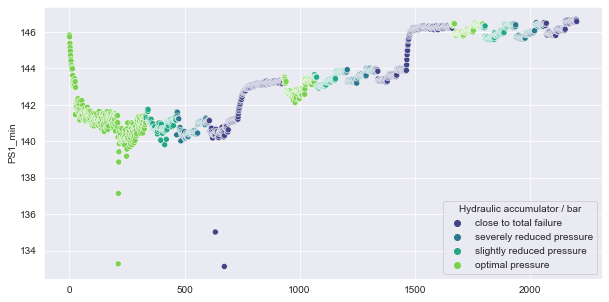

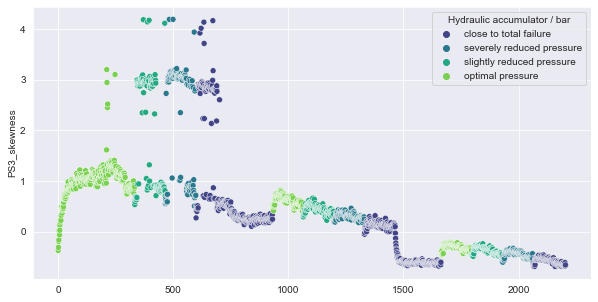

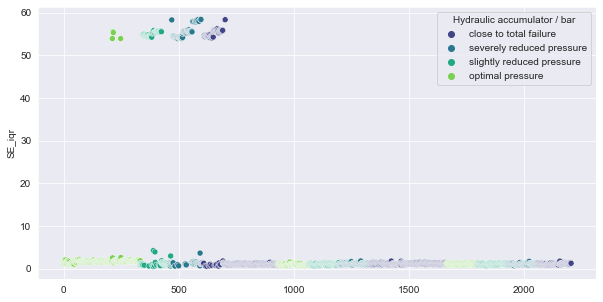

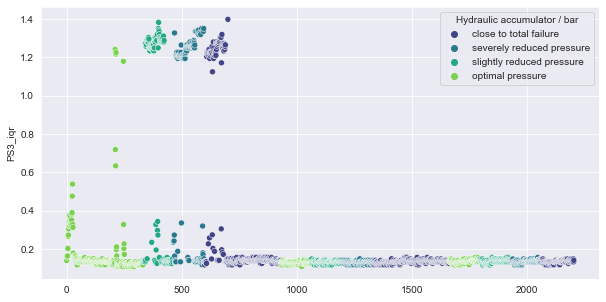

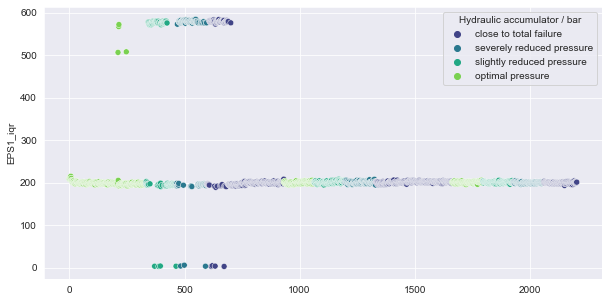

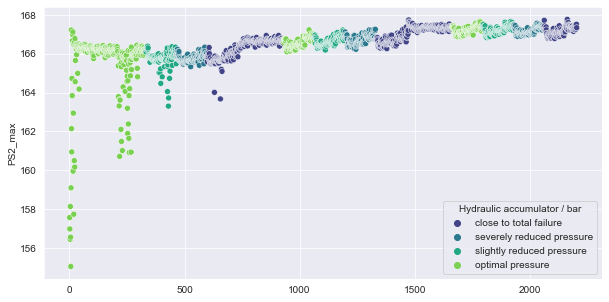

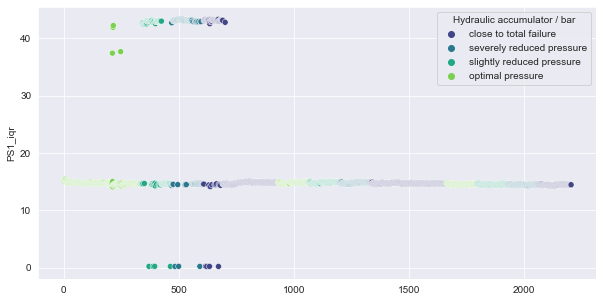

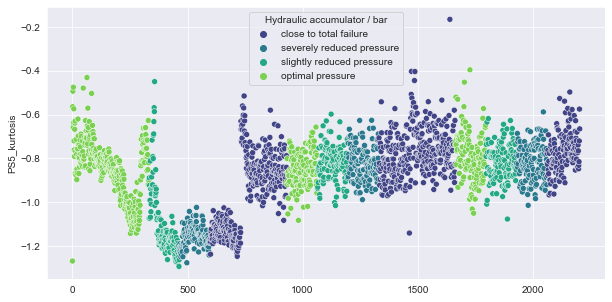

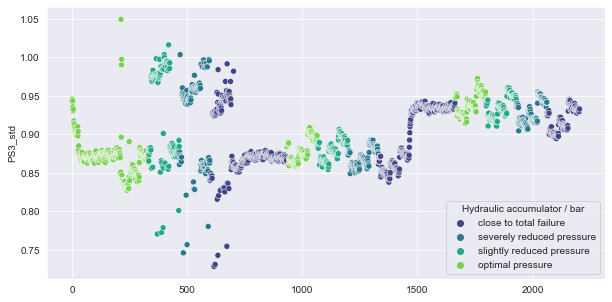

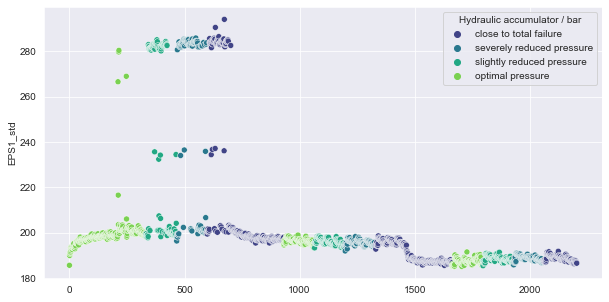

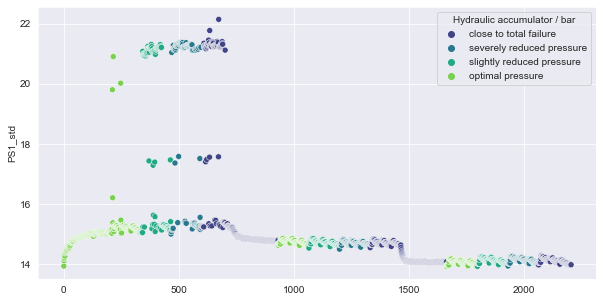

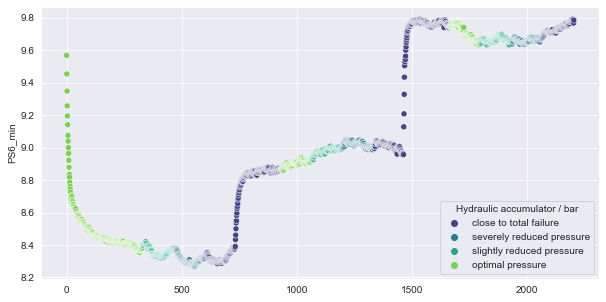

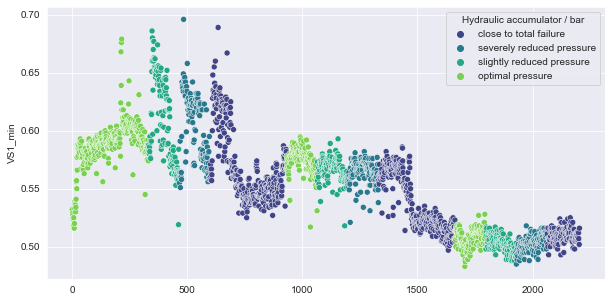

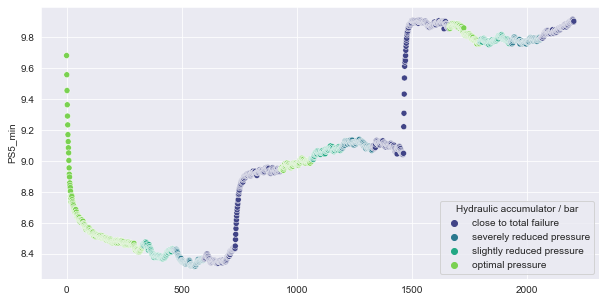

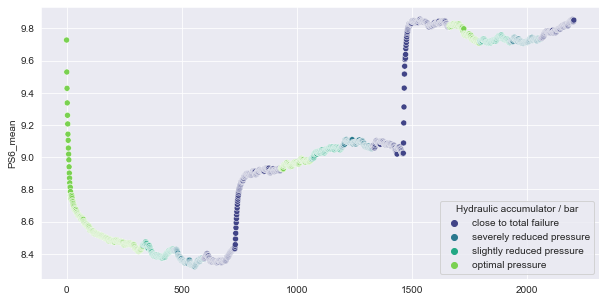

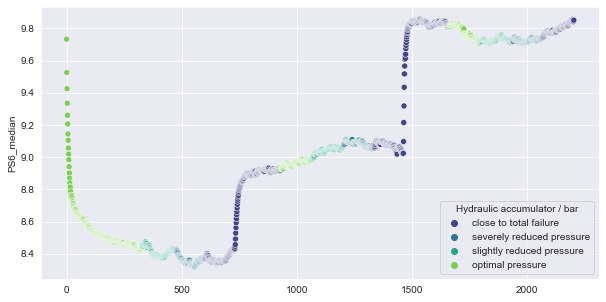

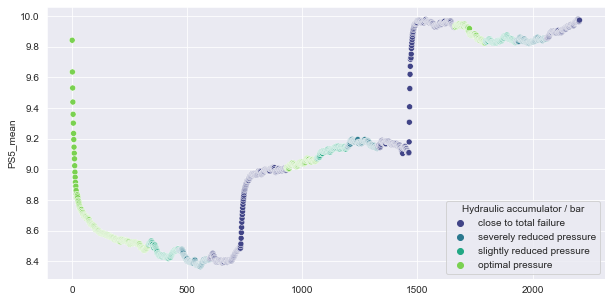

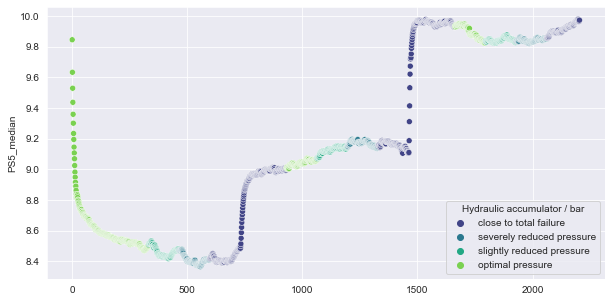

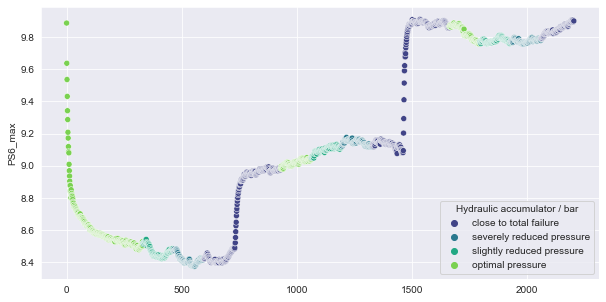

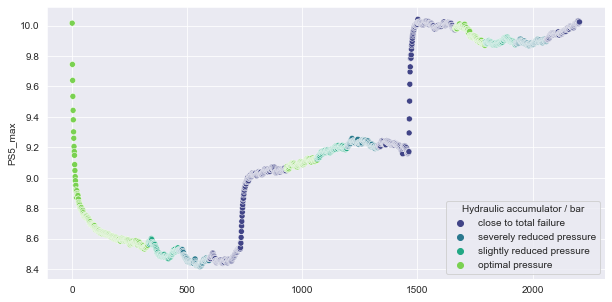

In [23]:

for i in df_accumulator_anova.drop('Hydraulic accumulator / bar',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_accumulator_anova,y=i,x=df_accumulator_anova.index,hue='Hydraulic accumulator / bar',palette='viridis')
    plt.show()

In [24]:
from scipy.stats import kendalltau

In [25]:
tau_values=[]
for i in X.columns:
    tau, p_value = kendalltau(X[i], y)
    tau_values.append(tau)

In [26]:
df_tau=pd.DataFrame()

In [27]:
df_tau['Features']=X.columns

In [28]:
df_tau['tau_value']=tau_values

In [29]:
df_tau['tau_value'].max()

0.4214709736027701

In [30]:
df_tau['tau_value'].min()

-0.2496826057062139

In [31]:
threshold=0.2
df_tau_strong=df_tau[(df_tau['tau_value']>threshold) | (df_tau['tau_value']<-threshold)]

In [32]:
df_tau_strong

Features  tau_value
13   PS2_kurtosis  -0.227777
14   PS2_skewness   0.229265
22   PS3_skewness   0.214946
81     FS1_median  -0.222422
83        FS1_max   0.268895
86   FS1_skewness   0.421471
133   SE_kurtosis  -0.249683
134   SE_skewness   0.269389

In [33]:
df_accumulator_tau=df_accumulator[df_tau_strong['Features']]
df_accumulator_tau['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar']

<ipython-input-33-8e27530d3dda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accumulator_tau['Hydraulic accumulator / bar']=df_accumulator['Hydraulic accumulator / bar']


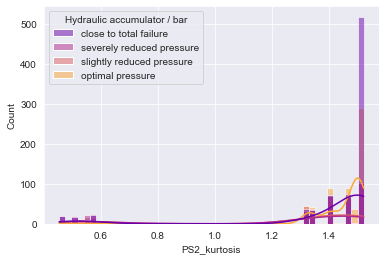

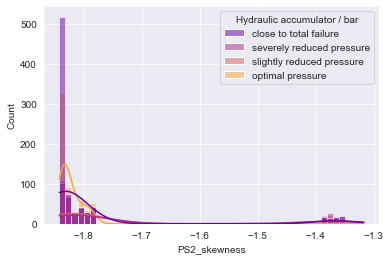

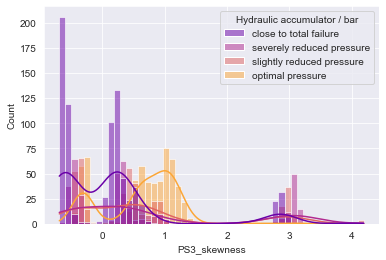

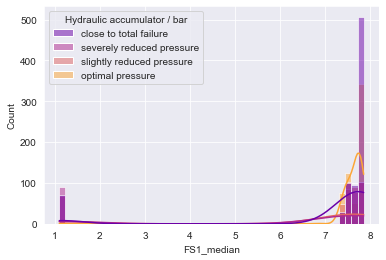

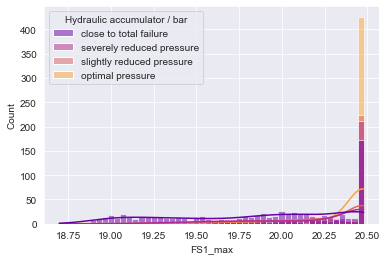

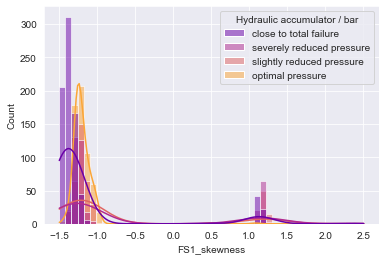

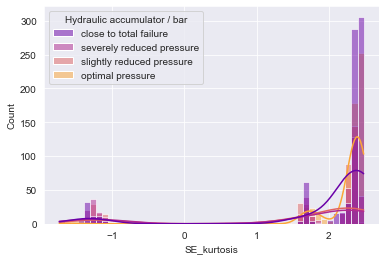

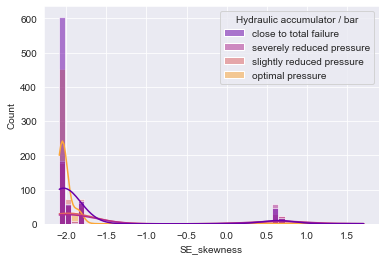

In [34]:
for i in df_accumulator_tau.drop('Hydraulic accumulator / bar',axis=1).columns:
    sns.histplot(data=df_accumulator_tau,x=i,hue='Hydraulic accumulator / bar',kde=True,bins=50,palette='plasma')
    plt.show()

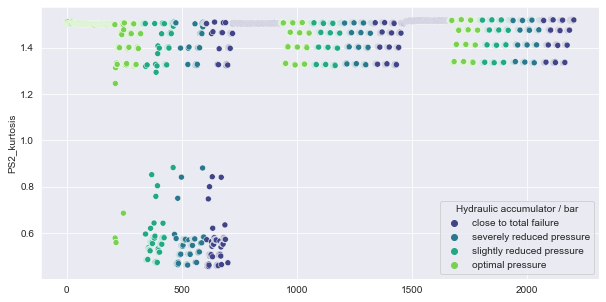

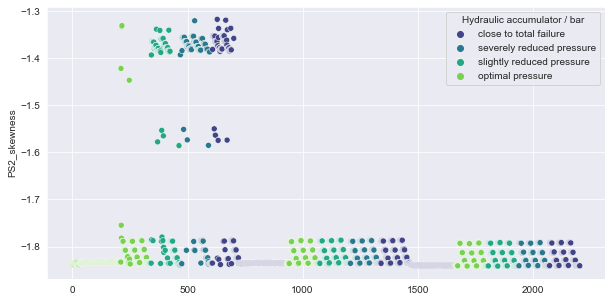

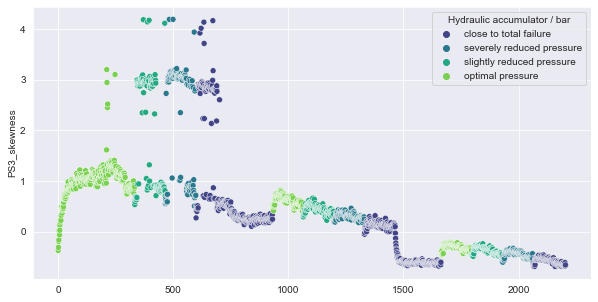

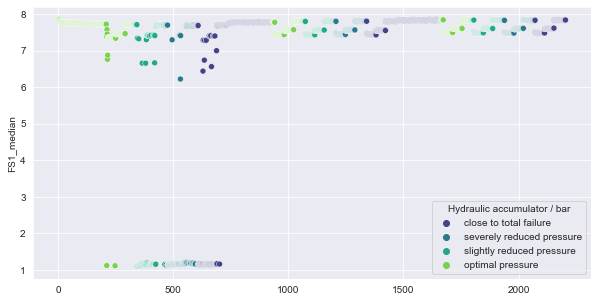

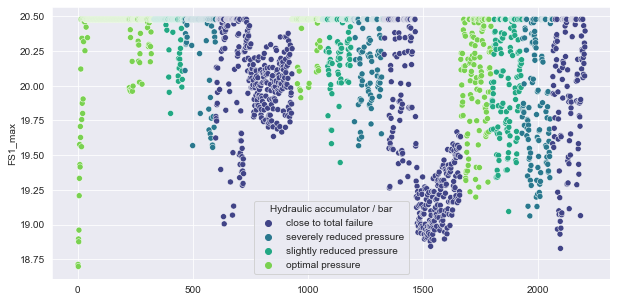

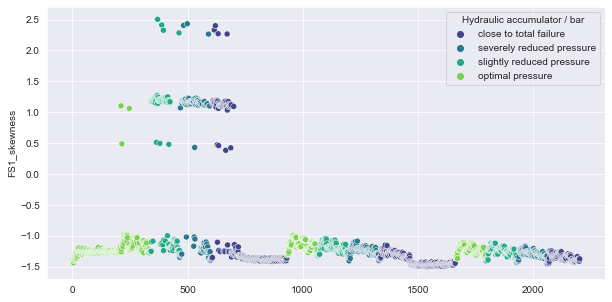

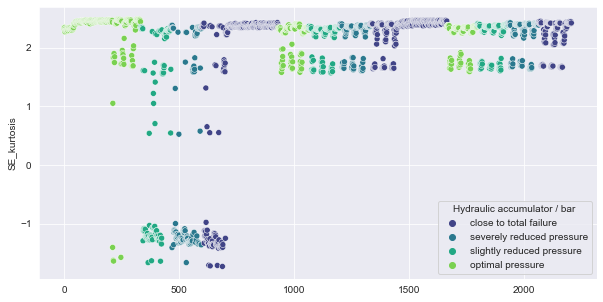

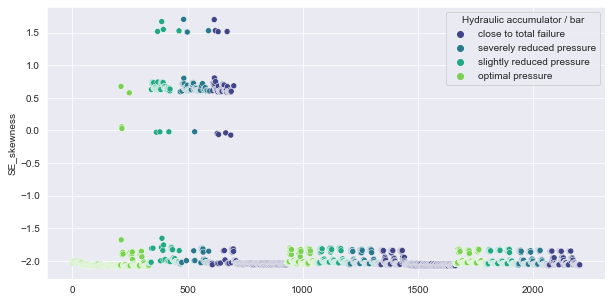

In [35]:
for i in df_accumulator_tau.drop('Hydraulic accumulator / bar',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_accumulator_tau,y=i,x=df_accumulator_tau.index,hue='Hydraulic accumulator / bar',palette='viridis')
    plt.show()

##### 1) From visualizations above, it is difficult to set a boundary condition, Therefore using machine learning algorithms to predict the conditions can yield better results in classifying hte condition of the valve

##### 2) The features selected by  ANOVA method contains features based on all the sensors, but the feature realted to flow sensor and pressure sensor have higher score, It can be concluded that the hydraulic accumulator is mainly effectd by the volume flow rate and pressure,but all the other features can also have a significant impact on the prediction

##### 3) The features selected by Kendall's method are also based on pressure and flow sensor, the tau value for flow sensor feature "FS1_Skewness" is greater than 0.30, indicates that this feature has a strong correlation and other features have correlation factor 0.20 and above indicate that they have a moderate correlation with the target.

##### Hence, it is observed that the distributions of features selected are not very well separated, and cannot be classified based on a certain boundary by visualizing the distribution plots, therefore, it is recommended to use machine learning algorithms to build a classifier for prediction.

## Using RandomForest Classifier 

In [14]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [15]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, log_loss, confusion_matrix, classification_report

In [16]:
X,y=df_accumulator.drop('Hydraulic accumulator / bar',axis=1),df_accumulator['Hydraulic accumulator / bar']

In [21]:
## Mapping Defects to defective(1) or non-defective(0)
y=y.map({'optimal pressure':1,'slightly reduced pressure':0,'severely reduced pressure':0,'close to total failure':0})

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hydraulic accumulator / bar', ylabel='count'>

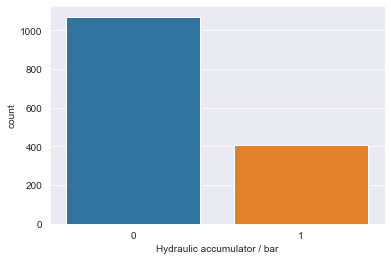

In [28]:
sns.countplot(y_train)

In [29]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf=RandomForestClassifier()

In [32]:
mcc_list=[]
acc_list=[]
log_list=[]
for train_idx,test_idx in cv.split(X_train,y_train):
    
    train_x,train_y=X_train.iloc[train_idx],y_train.iloc[train_idx]
    test_x,test_y=X_train.iloc[test_idx],y_train.iloc[test_idx]
    rf.fit(train_x,train_y)
    pred=rf.predict(test_x)
    mcc_list.append(matthews_corrcoef(test_y,pred))
    acc_list.append(accuracy_score(test_y,pred))
    log_list.append(log_loss(test_y,pred))
print(f'MCC:{np.mean(mcc_list)}')
print(f'Accuracy:{np.mean(acc_list)}')
print(f'Logloss:{np.mean(log_list)}')

MCC:0.9915127453695917
Accuracy:0.9966124599175445
Logloss:0.11700148943672314


In [33]:
y_hat= rf.predict(X_test)

In [36]:
mcc_score=matthews_corrcoef(y_test,y_hat)
mcc_score

0.9858989879424725

In [37]:
accuracy=accuracy_score(y_test,y_hat)
accuracy

0.9945054945054945

In [38]:
logloss=log_loss(y_test,y_hat)
logloss

0.1897756933715712

In [39]:
confusion_matrix(y_test,y_hat)

array([[533,   2],
       [  2, 191]], dtype=int64)

In [40]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       535
           1       0.99      0.99      0.99       193

    accuracy                           0.99       728
   macro avg       0.99      0.99      0.99       728
weighted avg       0.99      0.99      0.99       728



#### As mentioned earlier, using Random Forest Algorithm yields good results in classifaction of whether the accumulator is defective or not